In [496]:
import numpy as np
import pandas as pd

In [514]:
# activation function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    x = x - np.max(x, axis=1).reshape(-1,1)
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1,1)

def relu(x):
    return np.maximum(0,x)

In [143]:
# loss function

def loss(y,t):
    return np.sum(t*np.log(y)) / y.shape[0]

def cross_entropy_error(y,t):
    return -np.sum(t*np.log(y)) / len(t)

In [130]:
# 미분

# 해석적 미분
def _diff(f,x):
    h = 1e-7
    fx = f(x)
    tmp_val = x
    x = tmp_val + h
    fxh = f(x)
    return (fxh - fx) / h

# 수치 미분(비교용으로 작성함)
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    if x.ndim == 2: 
        for i in range(grad.shape[0]):
            for j in range(grad.shape[1]):
                fx = f(x[i,j])
                tmp_val = x[i,j]
                x[i,j] = tmp_val + h
                fxh = f(x[i,j])
                grad[i,j] = (fxh - fx)/h
                x[i,j] = tmp_val
        return grad
    else:
        for i in range(x.size):
            tmp_val = x[i]
            x[i] = tmp_val + h
            fxh1 = f(x[i])
            x[i] = tmp_val - h
            fxh2 = f(x[i])
            grad[i] = (fxh1-fxh2)/2*h
            x[i] = tmp_val
        return grad

In [220]:
class Network:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [136]:
net = Network()

In [140]:
t = np.array([[0.,1.,0.],[1.,0.,0.]])

In [139]:
x = np.array([[6.,5.],[4.,3.]])
net.predict(x)

array([[ 4.70498536, -9.07397197,  1.73768168],
       [ 2.80922174, -5.22175969,  1.19868554]])

In [144]:
net.loss(x,t)

7.005765166322093

In [145]:
def f(W):
    return net.loss(x,t)

In [146]:
numerical_gradient(f,net.W)

array([[ 2.51983941, -2.99945493,  0.47981046],
       [ 2.12763532, -2.49959097,  0.37207636]])

In [153]:
epochs = 10000
lr = 1e-5
for epoch in range(epochs):
    net.W = net.W - lr*numerical_gradient(f,net.W)

In [157]:
np.argmax(net.predict(x), axis=1)

array([0, 0])

In [158]:
np.argmax(t, axis=1)

array([1, 0])

In [76]:
# t = np.array(['monkey', 'cat', 'dog']) # 실제값 예시

In [77]:
# t_ohe = np.array(pd.get_dummies(pd.DataFrame(t))) # 원핫 인코더 변환

In [39]:
t = np.array([[0],[1],[2]]) # 실제값 예시

In [17]:
t.shape

(3, 1)

In [7]:
input_x = np.random.randn(3,2) # 입력값 예시

In [15]:
input_x

array([[ 0.76783545,  2.7098248 ],
       [ 1.93368309,  0.3786772 ],
       [-0.13376303,  0.26833326]])

In [35]:
w = np.random.randn(2,3) # 가중치 예시

In [73]:
output = np.dot(input_x,w) # 출력값 예시
output

array([[-0.80764507, -1.98999748,  2.72007723],
       [ 1.01157372,  0.22734616,  0.73575153],
       [-0.20913837, -0.25511312,  0.22849608]])

In [74]:
t = np.array([[1,0,0],[0,1,0],[0,0,1]]) # 실제값 분류를 위한 원핫 예시
t

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [79]:
t, softmax(output)

(array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 array([[0.02828623, 0.00867133, 0.96304243],
        [0.45138168, 0.20604317, 0.34257516],
        [0.28537961, 0.27255638, 0.44206401]]))

In [82]:
loss(softmax(output), t) # 손실함수 미분해서 뺴주기

-1.9871167574195965

In [88]:
def f(x):
    return np.sum(x**2)

In [90]:
f(np.array([3,4]))

25

In [94]:
_diff(f, np.array([3,4]))

14.000000234659637

In [96]:
np.argmax(softmax(output), axis=1)

array([2, 0, 2])

In [98]:
np.argmax(t, axis=1)

array([0, 1, 2])

In [125]:
x = np.array([[1.,2.,3.],[2.,3.,7.]])

In [129]:
grad = np.zeros_like(x)

In [131]:
f = lambda x : x**2
numerical_gradient(f,x)

array([[ 2.0003,  4.0001,  6.0001],
       [ 4.0001,  6.0001, 14.0001]])

In [159]:
loss(softmax(np.dot(x,w)), t)

-5.492216087878378

In [132]:
x = np.array([1.,2.,3.])
loss_func = cross_entropy_error(y,t)
numerical_gradient(,x)

array([2.e-08, 4.e-08, 6.e-08])

In [236]:
class Network2:
    def __init__(self):
        self.W = np.random.randn(2,2)
        self.b = np.random.randn(2)
        self.layer = {}
        self.layer['W'] = self.W
        self.layer['b'] = self.b
        
    def predict(self,x):
        W = self.layer['W']
        b = self.layer['b']
        return np.dot(x,W) + b
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [237]:
net2 = Network2()

In [238]:
net2.W, net2.b

(array([[-1.01030464, -0.48548217],
        [ 0.10772369,  1.070711  ]]),
 array([-0.49011797, -1.57497785]))

In [239]:
X = np.array([[0,0], [1,0], [0,1], [1,1]])
t = np.array([[1,0], [1,0], [1,0], [0,1]])

In [240]:
def f(W):
    return net2.loss(x,t)

In [245]:
epochs = 10000
lr = 1e-5
for epoch in range(epochs):
    net2.W = net2.W - lr*_diff(f,net2.layer)

TypeError: unsupported operand type(s) for +: 'dict' and 'float'

In [242]:
np.argmax(net2.predict(X), axis=1)

array([0, 0, 0, 1])

In [243]:
np.argmax(t, axis=1)

array([0, 0, 0, 1])

In [ ]:
## 아이리스 데이터로 

In [497]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [508]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size, output_size)
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        
        a1 = np.dot(x,W1) + b1 # 출력값
        z1 = relu(a1)
        a2 = np.dot(z1,W2) + b2
        out = softmax(a2)        
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W : self.loss(x,t)
        grads = {}
        grads['W1'] = numerical_gradient(f, self.W['W1']) # 밖에서 만든 numerical_gradient함수
        grads['b1'] = numerical_gradient(f, self.W['b1'])
        grads['W2'] = numerical_gradient(f, self.W['W2'])
        grads['b2'] = numerical_gradient(f, self.W['b2'])
        return grads
    
    # def gradient_descent(self,epochs):
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def train(self,epochs,learning_rate,x,t):
        for epoch in range(epochs):
            grads = self.numerical_gradient(x,t)
            for key in grads.keys():
                self.W[key] -= learning_rate*grads[key]
            # print(f'epoch:{epoch}, accuracy:{self.accuracy(x,t)}, loss:{self.loss(x,t)}')
            self.loss_val.append(self.loss(x,t))

In [510]:
X = load_iris()['data']
y = load_iris()['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

t_train = np.zeros((y_train.size,np.unique(y_train).size))
for i in range(len(t_train)):
    t_train[i,y_train[i]]=1
    
t_test = np.zeros((y_test.size,np.unique(y_test).size))
for i in range(len(t_test)):
    t_test[i,y_test[i]]=1
    
input_size = X_train.shape[1]
hidden_size = 10
output_size = t_train.shape[1]
model = TwoLayerNet(input_size,hidden_size,output_size)

In [511]:
model.train(10000,1e-3,X_train,t_train)

In [512]:
model.accuracy(X_test,t_test)

0.9666666666666667

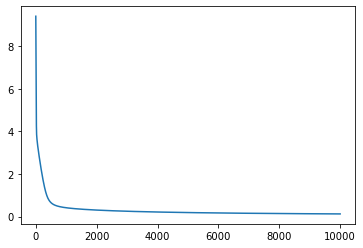

In [513]:
plt.plot(np.arange(len(model.loss_val)), model.loss_val)

In [489]:
len(model.loss_val)

91898

In [412]:
lr = 0.0001
epochs = 100
for epoch in range(epochs):
    grads = model.numerical_gradient(X,t)
    W1, W2 = model.numerical_gradient(X,t)['W1'], model.numerical_gradient(X,t)['W2']
    b1, b2 = model.numerical_gradient(X,t)['b1'], model.numerical_gradient(X,t)['b2']
    model.W['W1'] -= lr*W1
    model.W['W2'] -= lr*W2
    model.W['b1'] -= lr*b1
    model.W['b2'] -= lr*b2

In [452]:
def train(epochs,learning_rate,x,t):
    _loss = []
    for epoch in range(epochs):
        grads = model.numerical_gradient(x,t)
        for key in grads.keys():
            model.W[key] -= learning_rate*grads[key]
        print('epoch: ',epoch,', ', model.accuracy)
    _loss.append(model.loss(x,t))

In [437]:
train(100000,1e-3,X,t)

In [382]:
model.W['W1']

array([[ 2.37047522, -0.01605595, -0.63061755, -0.55999973, -0.95767395,
        -0.93954948,  0.98185956,  0.97651817,  0.83610965,  0.90341163],
       [ 1.07552276,  1.12262237,  0.51068921, -0.71514703,  0.02502264,
        -1.29770715, -0.37851101, -1.19861286,  2.47489194,  0.8208217 ],
       [-0.26325085,  1.49603209,  0.92995654,  1.92150944, -0.73383483,
        -0.90123629,  0.59557198, -0.58508205, -0.88116782, -1.61666087],
       [-2.52819535, -0.43460632,  2.31572323,  1.26682909,  0.23796036,
        -0.46490806,  0.40098569,  1.80681689,  0.1964086 , -1.72380565]])

In [375]:
model.numerical_gradient(X,t)

{'W1': array([[ 1.08686194e-03,  2.89285915e-04,  5.03890107e-05,
          3.10037689e-04, -8.98677361e-02, -2.58639641e-01,
         -3.36324484e-03, -4.64041344e-03, -5.57538007e-04,
         -1.46094044e-01],
        [ 7.44932520e-04,  2.93915698e-04,  3.67875175e-05,
          1.19919427e-03, -3.97370756e-02, -2.19938247e-01,
         -1.54401069e-03, -3.35126769e-03, -4.13105963e-04,
         -2.07158945e-01],
        [ 3.00135339e-04,  9.48103978e-04,  5.12304643e-06,
         -2.87443193e-03, -8.03324364e-02,  1.05917375e-02,
         -3.21983432e-03, -1.08831397e-03, -5.23453103e-05,
          2.09781786e-01],
        [ 4.95805086e-05,  6.16962050e-04, -1.46355150e-06,
         -1.43170613e-03, -3.03313359e-02,  2.32550519e-02,
         -1.33075833e-03, -1.47534809e-04,  3.05881609e-05,
          1.08461981e-01]]),
 'b1': array([ 2.23891496e-12, -8.66419658e-13,  1.12986831e-13,  3.44934940e-12,
        -1.32954107e-10, -5.78342986e-10, -5.19138349e-12, -9.59040367e-12,
      

In [449]:
np.argmax(model.predict(X), axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [450]:
np.argmax(t, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [453]:
sum(np.argmax(model.predict(X), axis=1) == np.argmax(t, axis=1))/t.size

0.32222222222222224

In [454]:
model.accuracy(X,t)

0.9666666666666667